#### 1. 샘플데이터셋 적재하기

In [1]:
from sklearn import datasets

# 숫자 데이터셋을 적재합니다.
digits = datasets.load_digits()

features = digits.data
target = digits.target

features[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

사이킷런에서는 학습을 위해 작은 데이터셋(토이 데이터셋) 여러개를 제공  
1. load_boston : 보스턴 주택가격에 대한 503개의 샘플, 회귀 알고리즘 학습
2. load_iris : 150개의 붓꽃 샘플 치수, 분류 알고리즘 학습
3. load_digits : 손으로 쓴 숫자 이미지 1979개, 이미지 분류 학습

In [2]:
# sklearn.datasets 모듈 아래에 있는 함수드은 딕셔너리와 유사한 Bunch 클래스 객체를 반환
print(digits.keys())
print(type(digits.keys()))

# DESCR 키는 데이터 셋에 대한 설명
digits['DESCR'][:70]

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
<class 'dict_keys'>


'.. _digits_dataset:\n\nOptical recognition of handwritten digits dataset'

In [3]:
# datasets.load_XX() 는 매개변수로 유일하게 반환값을 Bunch 클래스가 아닌 feature, target으로 반환하는 return_X_y를 가짐

import numpy as np
# 단 digits 데이터셋은 추가적으로 필요한 숫자를 정할 수 있는 n_class라는 파라미터를 추가제공
X, y = datasets.load_digits(n_class=5, return_X_y = True)
np.unique(y)

array([0, 1, 2, 3, 4])

#### 2.2 모의 데이터셋 만들기

주로 사용하는 모의 데이터셋  
1. make_regression() : 선형회귀에 적용할 데이터셋
2. make_classification() : 분류에 적용할 데이터셋
3. make_blobs() : 군집 알고리즘에 적용할 데이터셋

In [4]:
# 선형회귀용 데이터셋
from sklearn.datasets import make_regression

features, target, coefficients = make_regression(n_samples = 100,      # 샘플의 총 개수
                                                 n_features = 3,       # featre의 개수 설정
                                                 n_informative = 3,    # target벡터를 생성하는 데 사용할 feature 수 결정, n_features 보다 더 많으면 몇가지 feature는 target과 무관
                                                 n_targets = 1,        # target의 개수
                                                 noise = 0,
                                                 coef = True,
                                                 random_state = 1)

print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
타깃 벡터
 [-10.37865986  25.5124503   19.67705609]


In [5]:
# 분류용 데이터셋
from sklearn.datasets import make_classification

features, target = make_classification(n_samples = 100,
                                       n_features = 3, 
                                       n_informative = 3, 
                                       n_redundant = 0,
                                       n_classes = 2, 
                                       weights = [.25, .75],  # 샘플의 한 클래스 당 비율, 불균형한 클래스를 가진 모의 데이터셋을 만들때 사용
                                       random_state = 1)

print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
타깃 벡터
 [1 0 0]


In [6]:
# 군집 알고리즘용 데이터셋
from sklearn.datasets import make_blobs

features, target = make_blobs(n_samples = 100,
                              n_features = 2, 
                              centers = 3,       # 생성될 클러스터의 수를 결정
                              cluster_std = 0.5,
                              shuffle = True, 
                              random_state = 1)

print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
타깃 벡터
 [0 1 1]


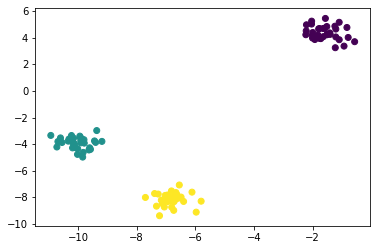

In [7]:
# 군집화 시각화

import matplotlib.pyplot as plt

plt.scatter(features[:,0], features[:,1], c=target)
plt.show()

#### 2.3 CSV 파일 적재하기

read_csv() 함수 사용하기  
> __유의사항__
>1. 적재하기 전 파일의 내용을 잠깐 확인할 것, 데이터셋의 구성을 확인하면 어떤 매개변수를 설정할 지 도움이 된다.
>2. read_csv()의 매개변수는 약 30개 ex) sep : 구분자, header : 제목행이 몇번째 줄인지 지정 등

In [8]:
import pandas as pd

url = 'https://tinyurl.com/simulated-data'
dataframe = pd.read_csv(url)
dataframe.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


In [9]:
# skiprows 매개변수는 건너 뛸 행의 개수 or 범위지정
# nrows : 읽어들일 행의 개수

dataframe = pd.read_csv(url, skiprows = range(1,11), nrows = 1)
dataframe

,integer,datetime,category
0,5,2015-01-01 00:00:10,0


#### 2.4 엑셀파일 적재하기
read_excel() 함수 사용하기
- read_excel()도 다양한 매개변수가 있으므로 필요시 찾아볼것

In [10]:
url = 'https://tinyurl.com/simulated-excel'

dataframe = pd.read_excel(url, sheet_name = 0, header = 1)
dataframe.head(2)

,5,2015-01-01 00:00:00,0
0,5,2015-01-01 00:00:01,0
1,9,2015-01-01 00:00:02,0


#### 2.5 JSON파일 적재하기

__JSON__ : JavaScript Object Notation. __'키-값 쌍'__ 으로 이뤄진 데이터 오브젝트를 전달하기 위해 인간이 읽을 수 있는 텍스트를 사용하는 개방형 표준포맷. 주로 인터넷에서 자료를 주고 받을 때 그 자료를 표현하는 방법

In [11]:
# 일반적으로 JSON 파일은 다음의 파일구조를 가짐
'''
{
    'integer' : {
        '0' : 5,
        '1' : 5,
        ...
    },
    
    'dataframe' : {
        '0' : 1420070400000,
        '1' : 1420070401000,
        ...
    },
    'category' : {
        '0' : 0,
        '1' : 0,
        ...
    }
}
'''

"\n{\n    'integer' : {\n        '0' : 5,\n        '1' : 5,\n        ...\n    },\n    \n    'dataframe' : {\n        '0' : 1420070400000,\n        '1' : 1420070401000,\n        ...\n    },\n    'category' : {\n        '0' : 0,\n        '1' : 0,\n        ...\n    }\n}\n"

In [12]:
url = 'https://tinyurl.com/simulated-json'
dataframe = pd.read_json(url, orient = 'columns')
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


#### 2.6 SQL 데이터베이스로부터 적재하기

read_sql_query() 함수를 이용.  
단 데이터베이스는 SQL 문법 자체를 배워야 정확히 다룰 수 있음. 해당 함수는 데이터베이스와 파이썬을 연결하는 정도

In [13]:
import pandas as pd
from sqlalchemy import create_engine

database_connection = create_engine('sqlite:///sample.db')


pd.read_sql_query("SELECT * FROM data", database_connection)

#dataframe.head()

OperationalError: (sqlite3.OperationalError) no such table: data
[SQL: SELECT * FROM data]
(Background on this error at: http://sqlalche.me/e/13/e3q8)